In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O /tmp/horse-or-human.zip

--2022-12-19 17:20:50--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.142.128, 74.125.195.128, 173.194.203.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.142.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M   208MB/s    in 0.7s    

2022-12-19 17:20:51 (208 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]



In [ ]:
import os
import zipfile

In [ ]:
local_zip = '/tmp/horse-or-human.zip'

In [ ]:
zip_ref = zipfile.ZipFile(local_zip, 'r')

In [ ]:
zip_ref.extractall('/tmp/horse-or-human/')

In [ ]:
zip_ref.close()

In [ ]:
train_horse_dir = os.path.join('/tmp/horse-or-human/horses')

In [ ]:
train_human_dir = os.path.join('/tmp/horse-or-human/humans')

In [ ]:
os.listdir(train_horse_dir)[:5]

['horse24-1.png',
 'horse49-9.png',
 'horse20-1.png',
 'horse25-8.png',
 'horse45-3.png']

In [ ]:
os.listdir(train_human_dir)[:5]

['human07-04.png',
 'human11-04.png',
 'human08-26.png',
 'human14-21.png',
 'human05-22.png']

In [ ]:
print(len(os.listdir(train_human_dir)))

527


In [ ]:
%matplotlib inline

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [ ]:
ncols = 4
nrows = 4

pic_index = 0

In [ ]:
train_horse_names = os.listdir('/tmp/horse-or-human/horses')
train_human_names = os.listdir(train_human_dir)

In [ ]:
pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname) for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname) for fname in train_human_names[pic_index-8:pic_index]]

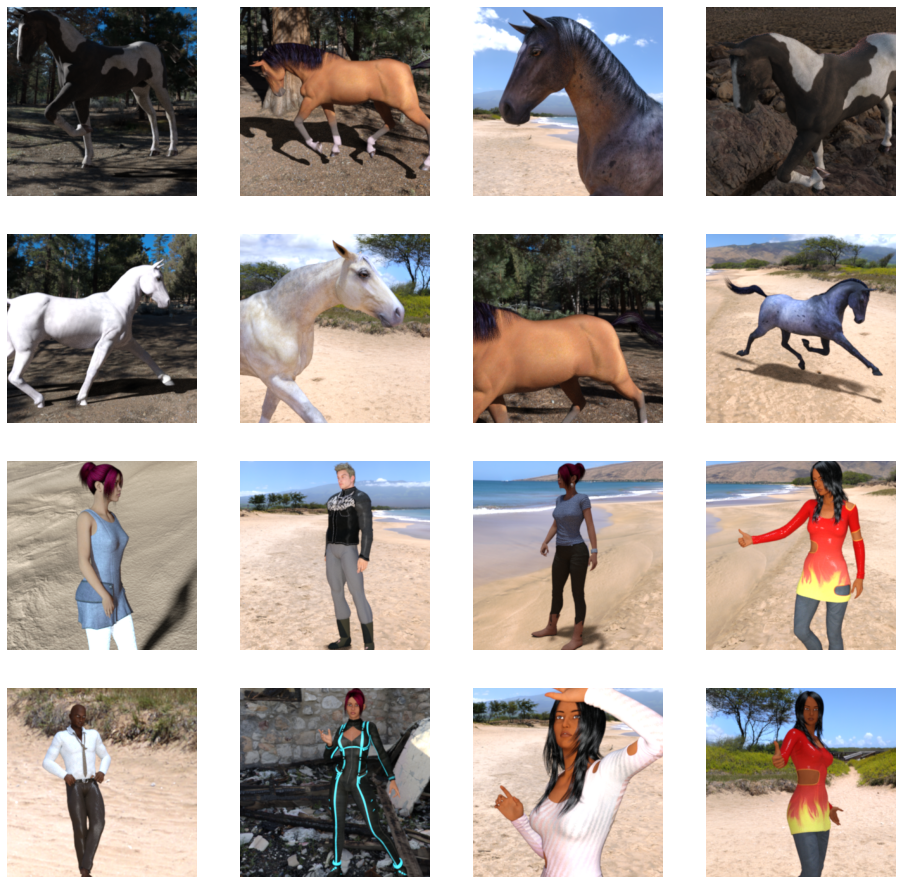

In [ ]:
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

for i, img_path in enumerate(next_horse_pix + next_human_pix):
  sp = plt.subplot(nrows, ncols, i+1)
  sp.axis('Off')

  img = mpimg.imread(img_path)
  plt.imshow(img)


### Model

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D

In [ ]:
model = tf.keras.models.Sequential([
    # Warstwa 1 - 16 map
    Conv2D(16, (3,3), activation = 'relu', input_shape = (300, 300, 3)),
    MaxPooling2D(2,2),
    # Warstwa 2 - 32 mapy
    Conv2D(32, (3,3), activation = 'relu'),
    MaxPooling2D(2,2),
    # Warstwa 3 - 64 mapy
    Conv2D(64, (3,3), activation = 'relu'),
    MaxPooling2D(2,2),
    # Warstwa 4 - 64 mapy
    Conv2D(64, (3,3), activation = 'relu'),
    MaxPooling2D(2,2),
    # Warstwa 5 - 64 mapy
    Conv2D(64, (3,3), activation = 'relu'),
    MaxPooling2D(2,2),
    # Transformacja rezultatu to pojedynczego wektora
    Flatten(),
    # Warstwa ukryta posiadająca 512 neuronów
    Dense(512, activation = 'relu'),
    # Jeden neuron wyjściowy, będzie generował wartości 0 lub 1, określając etykietę klasy
    Dense(1, activation = 'sigmoid')
])

In [ ]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss = 'binary_crossentropy', optimizer=RMSprop(lr=0.001), metrics = ['accuracy'])

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1/255.0,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
    )

train_generator = train_datagen.flow_from_directory(
    '/tmp/horse-or-human/',
    target_size = (300, 300),
    batch_size = 128,
    class_mode = 'binary'
)

Found 1027 images belonging to 2 classes.


In [ ]:
# dir(train_generator)
train_generator.class_indices

{'horses': 0, 'humans': 1}

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=8,
    epochs = 15,
    verbose = 1
)

Epoch 1/15
8/8 [==============================] - 20s 2s/step - loss: 0.5877 - accuracy: 0.7709
Epoch 2/15
8/8 [==============================] - 20s 2s/step - loss: 0.7087 - accuracy: 0.7531
Epoch 3/15
8/8 [==============================] - 20s 2s/step - loss: 0.4211 - accuracy: 0.8242
Epoch 4/15
8/8 [==============================] - 20s 2s/step - loss: 0.3959 - accuracy: 0.8131
Epoch 5/15
8/8 [==============================] - 19s 2s/step - loss: 0.2723 - accuracy: 0.8821
Epoch 6/15
8/8 [==============================] - 20s 2s/step - loss: 0.4843 - accuracy: 0.7809
Epoch 7/15
8/8 [==============================] - 20s 2s/step - loss: 0.2821 - accuracy: 0.8754
Epoch 8/15
8/8 [==============================] - 20s 3s/step - loss: 0.3194 - accuracy: 0.8587
Epoch 9/15
8/8 [==============================] - 20s 2s/step - loss: 0.3341 - accuracy: 0.8598
Epoch 10/15
8/8 [==============================] - 20s 2s/step - loss: 0.4130 - accuracy: 0.8331
Epoch 11/15
8/8 [======================

In [ ]:
dir(model)

['_SCALAR_UPRANKING_ON',
 '_TF_MODULE_IGNORED_PROPERTIES',
 '__call__',
 '__class__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_activity_regularizer',
 '_add_trackable',
 '_add_trackable_child',
 '_add_variable_with_custom_getter',
 '_assert_compile_was_called',
 '_assert_weights_created',
 '_auto_track_sub_layers',
 '_autocast',
 '_autographed_call',
 '_base_model_initialized',
 '_build_graph_network_for_inferred_shape',
 '_build_input_shape',
 '_call_accepts_kwargs',
 '_call_arg_was_passed',
 '_call_fn_arg_defaults',
 '_call_fn_arg_positions',
 '_call_fn_args',
 '_call_full_argspec',
 '_callable_losses',
 '_ca

1/1 [==============================] - 0s 223ms/step


<ipython-input-25-d5bfb57b081c>:43: RuntimeWarning: invalid value encountered in true_divide
  x /= x.std()


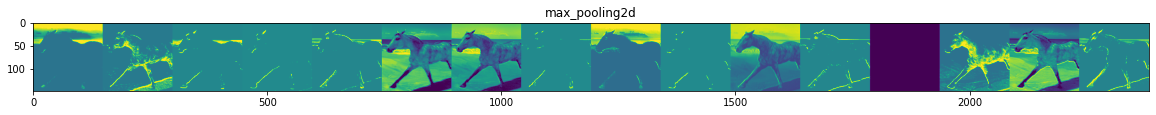

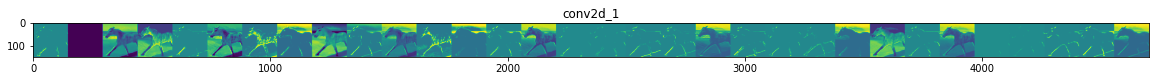

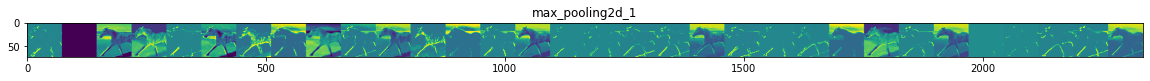

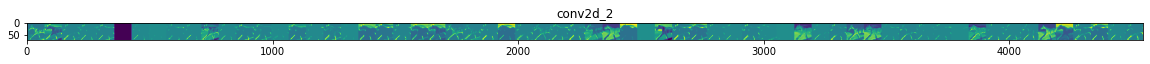

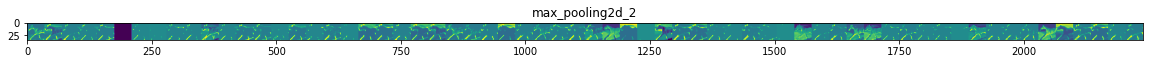

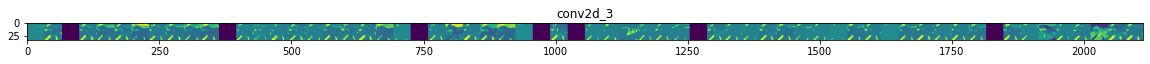

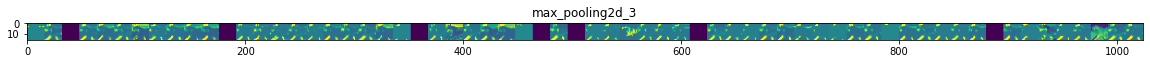

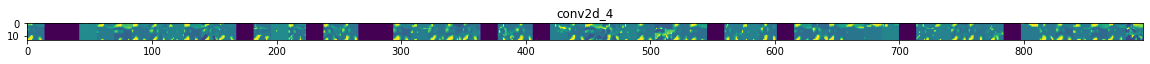

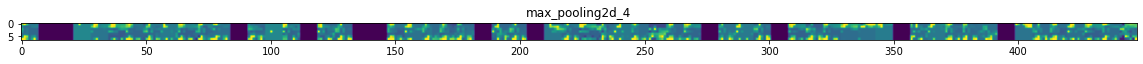

In [ ]:


import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
# Let's prepare a random input image from the training set.
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)

img = load_img(img_path, target_size=(300, 300))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers[1:]]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

##Beauty Laine
###Test model na dowolnym obrazku z internetu - do testu wybraliśmy następujący obrazek

https://shamazeboutique.co.uk/wp-content/uploads/2019/04/beautiful-1274056.jpg

In [ ]:
import numpy as np
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

In [ ]:
uploaded = files.upload()

Saving beautiful-1274056_640.jpg to beautiful-1274056_640.jpg


In [ ]:
for fn in uploaded.keys():
  path = '/content/' + fn
  img = load_img(path, target_size=(300, 300))
  x = img_to_array(img)
  x = np.expand_dims(x, axis=0)

  image_tensor = np.vstack([x])
  classes = model.predict(image_tensor)
  print(classes[0])

1/1 [==============================] - 0s 30ms/step
[1.]


In [ ]:
train_generator.class_indices

{'horses': 0, 'humans': 1}